## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column 'price').

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
#import necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\dbazoneny\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#download dataset from kaggle using API key
import opendatasets as od
url = "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv"
od.download(url)

Skipping, found downloaded files in ".\new-york-city-airbnb-open-data" (use force=True to force download)


Loading the data

Use only the following columns:

'neighbourhood_group',
'room_type',
'latitude',
'longitude',
'minimum_nights',
'number_of_reviews','reviews_per_month',
'calculated_host_listings_count',
'availability_365',
'price'

Fill NAs with 0

Apply the log tranform to price

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1

Use DictVectorizer to turn the dataframe into matrices


In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [4]:
df.shape

(48895, 10)

In [5]:
df.isnull().sum() #check for null values

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [6]:
#applying log transfirmation to price
data = df.copy()

In [7]:
df['log_price']= np.log1p(df['price']) #log tranfromation

In [8]:
df['price'].skew(),df['log_price'].skew() #checking skew of price before and after log transformation

(19.118938995046033, 0.5531045462041445)

In [9]:
#Do train/validation/test split with 60%/20%/20% distribution.
#Use the train_test_split function and set the random_state parameter to 1
from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [10]:
df_full_train.shape,df_test.shape,df_train.shape,df_val.shape

((39116, 11), (9779, 11), (29337, 11), (9779, 11))

**Now, use DictVectorizer to turn train and validation into matrices:**

In [11]:
# lets set features and target variables
X_train = df_train.drop(['price','log_price'],axis=1)
y_train = df_train['log_price']
X_val = df_val.drop(['price','log_price'],axis=1)
y_val = df_val['log_price']
X_test = df_test.drop(['price','log_price'],axis=1)
y_test = df_test['log_price']

In [12]:
# we will use DictVectorizer() for onehot encoding of cat columns
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [13]:
train_dicts = X_train.to_dict(orient='records') #convert train data to dict
X_train_encoded = dv.fit_transform(train_dicts) #fit and transform Dictvectorizer on train data

In [14]:
#using ohe on val dataset
val_dicts =  X_val.to_dict(orient='records')
X_val_encoded = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable.

Train a model with max_depth=1



In [15]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = DecisionTreeRegressor(max_depth=1,random_state=1)
model.fit(X_train_encoded,y_train)

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [17]:
text_representation = tree.export_text(model,feature_names=dv.get_feature_names())
print(text_representation)

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



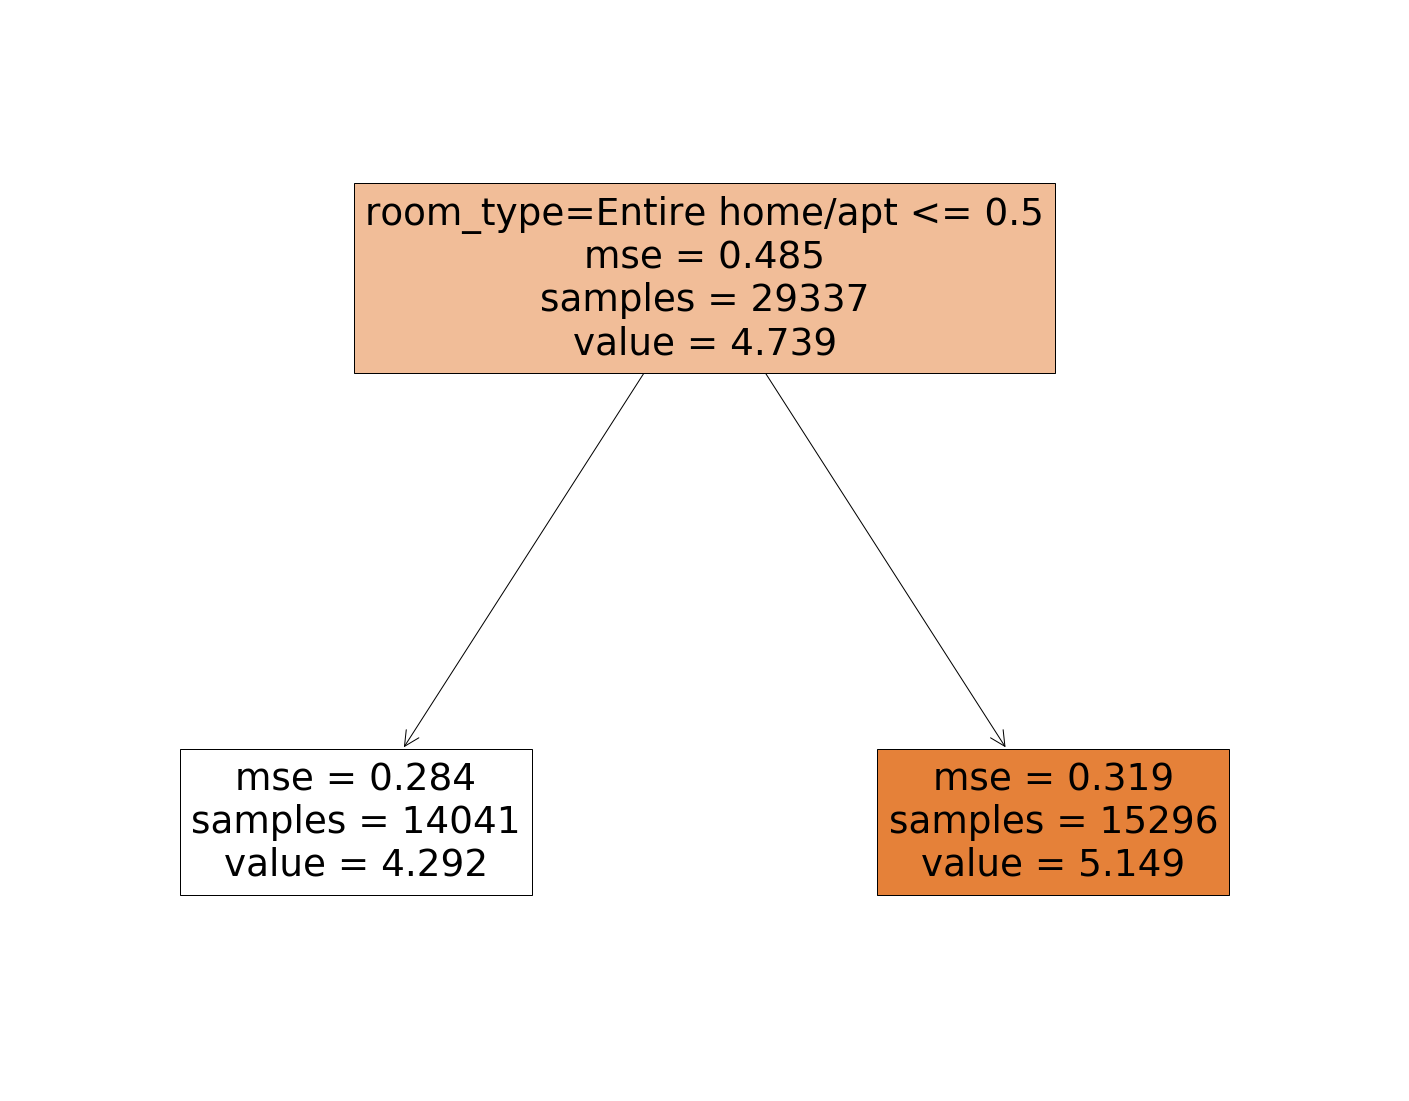

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=dv.get_feature_names(),                   
                   filled=True)

**Which feature is used for splitting the data?**

room_type

neighbourhood_group

number_of_reviews

reviews_per_month

Ans room_type

## Question 2

Train a random forest model with these parameters:

n_estimators=10

random_state=1

n_jobs=-1 (optional - to make training faster)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf_model.fit(X_train_encoded,y_train)

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import p

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [20]:
preds = rf_model.predict(X_val_encoded)

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [21]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_val,preds))

0.46086790130720745

**What's the RMSE of this model on validation?**

0.059
0.259
0.459
0.659

Ans 0.459

## Question 3

Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10

Set random_state to 1

Evaluate the model on the validation dataset

In [22]:
scores =[]
for estimator in np.arange(10,210,10):
    
    rf_model = RandomForestRegressor(n_estimators=estimator,random_state=1,n_jobs=-1)
    rf_model.fit(X_train_encoded,y_train)
    preds = rf_model.predict(X_val_encoded)
    scores.append(np.sqrt(metrics.mean_squared_error(y_val,preds)))

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note l

C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\dbazoneny\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note l

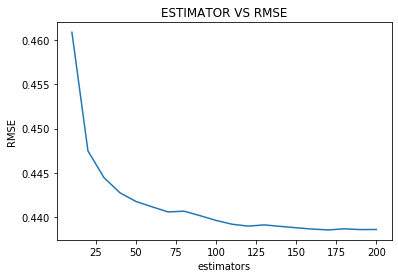

In [23]:
plt.plot(np.arange(10,210,10),scores)
plt.title('ESTIMATOR VS RMSE')
plt.xlabel('estimators')
plt.ylabel('RMSE')
plt.show()

After which value of n_estimators does RMSE stop improving?

10

50

70

120

Ans : 120

In [24]:
for x,y in zip(np.arange(10,210,10),scores):
    print(x,y,end='\t\t')
    

10 0.46086790130720745		20 0.4474775997059162		30 0.44446000758920984		40 0.44274827054719545		50 0.4417686917022102		60 0.44116772862105097		70 0.4405902161813063		80 0.44067372663870075		90 0.44016700495135824		100 0.4396311956667643		110 0.4392016399142857		120 0.43898764753051844		130 0.4391252193999718		140 0.438960362195565		150 0.4388032409017498		160 0.4386538950065303		170 0.4385590771751198		180 0.4386813215444797		190 0.43859797676212486		200 0.4386079011876555		

## Question 4

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]

For each of these values, try different values of n_estimators from 10 till 200 (with step 10)

Fix the random seed: random_state=1

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Minimum value of RMSE for max_depth=10 is 0.4396630337408857


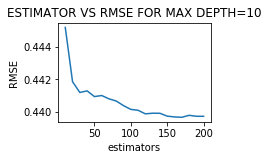

Minimum value of RMSE for max_depth=15 is 0.43586580243661194


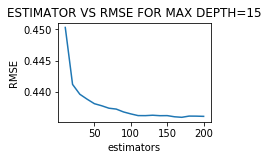

Minimum value of RMSE for max_depth=20 is 0.4375711473600015


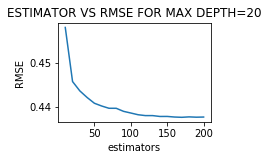

Minimum value of RMSE for max_depth=25 is 0.4385887296598882


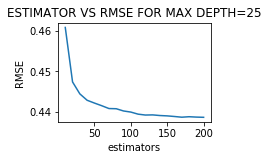

In [26]:
max_depth_values =  [10, 15, 20, 25]
estimator_values = np.arange(10,210,10)
count=1
for max_depth in max_depth_values:
    loop_scores =[]
    for estimator in estimator_values:
        rf_model = RandomForestRegressor(max_depth=max_depth,n_estimators=estimator,random_state=1,n_jobs=-1)
        rf_model.fit(X_train_encoded,y_train)
        preds = rf_model.predict(X_val_encoded)
        loop_scores.append(np.sqrt(metrics.mean_squared_error(y_val,preds)))
    print(f'Minimum value of RMSE for max_depth={max_depth} is {min(loop_scores)}')     
    plt.subplot(2,2,count)
    plt.plot(np.arange(10,210,10),loop_scores)
    
    plt.title(f'ESTIMATOR VS RMSE FOR MAX DEPTH={max_depth}')
    plt.xlabel('estimators')
    plt.ylabel('RMSE')
    plt.show() 
    count+=1

What's the best max_depth:

10
15
20
25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

Ans : 15

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:

n_estimators=10,

max_depth=20,

random_state=1,

n_jobs=-1 (optional)

Get the feature importance information from this model

In [27]:
rf_model = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)

In [28]:
rf_model.fit(X_train_encoded,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

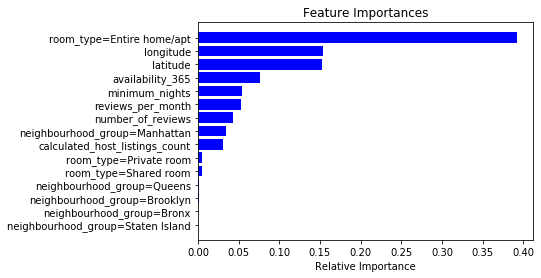

In [29]:
features = dv.get_feature_names()
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**What's the most important feature?**

neighbourhood_group=Manhattan

room_type=Entire home/apt

longitude

latitude

**Ans room_type=Entire home/apt**

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [31]:
#!pip install xgboost

In [33]:
import xgboost as xgb
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train_encoded,label=y_train,feature_names=features)
dval = xgb.DMatrix(X_val_encoded,label=y_val,feature_names=features)


In [34]:
xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1,

'objective': 'reg:squarederror',
'nthread': 8,

'seed': 1,
'verbosity': 1,
}

In [36]:
model = xgb.train(xgb_params,dtrain,num_boost_round=100)

In [41]:
from sklearn import metrics
y_pred = model.predict(dval)


In [44]:
np.sqrt(metrics.mean_squared_error(y_val,y_pred))

0.43621034591295677

In [47]:
eta_list =[0.1,0.01]
for eta in eta_list:
    xgb_params = { 'eta': eta, 'max_depth': 6, 'min_child_weight': 1,'objective': 'reg:squarederror','nthread': 8,
                    'seed': 1,'verbosity': 1,}
    model = xgb.train(xgb_params,dtrain,num_boost_round=100)
    y_pred = model.predict(dval)
    print(f'The RMSE for eta={eta} is {np.sqrt(metrics.mean_squared_error(y_val,y_pred))}')
    

The RMSE for eta=0.1 is 0.43249655247991464
The RMSE for eta=0.01 is 1.630452438951798


Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
0.01

Ans 0.1